# Project Cause: Racial Justice

Project Description: We’re creating a data platform that measures the performance of Black-, Asian-, Latino-, and Women-owned employer firms across the largest 100 metropolitan areas and cities in the U.S. The goal is to capture and rank the performance of these minority-owned businesses to promote a clearer understanding of the small business ecosystem, encourage goal setting, and provide actionable comparison points for policymakers in the U.S.

Project Objective: Develop a clustering algorithm that groups cities and metros according to their economic and demographic characteristics, so we can help local stakeholders to identify the cities/metros to which they should be comparing their performance to.


In [1]:
#### Uploading Libraries

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
### Data loading

In [75]:
df = pd.read_excel('database_peers(final)_new.xls')

In [76]:
df.head()

,place_code,state_code,place_name,population,population_range,region,black_percentage,asian_percentage,hispanic_percentage,poverty_rate,unemployment_rate,college+_rate,household_income,jobs_manufacturing,jobs_nontradable
0,7000,1,Birmingham,212744,<250K,South,0.711249,0.011629,0.034464,0.244703,10.171122,0.185058,21216,0.087914,0.435968
1,3000,2,Anchorage,294356,250K-400K,West,0.050313,0.107509,0.089738,0.096142,5.642562,0.229314,36321,0.019000,0.404610
2,27400,4,Gilbert town,242362,<250K,West,0.026411,0.050028,0.156398,0.055702,4.411837,0.267740,40769,0.099698,0.385786
3,27820,4,Glendale,246708,<250K,West,0.079316,0.046217,0.364759,0.163829,5.844659,0.129907,26293,0.063407,0.430350
4,65000,4,Scottsdale,249947,<250K,West,0.025605,0.047794,0.098781,0.077877,3.698453,0.435276,45824,0.059127,0.344301


In [77]:
df.place_code.nunique()

72

In [78]:
df.state_code.nunique()

35

In [79]:
df.place_name.nunique()

105

In [80]:
df.population_range = df.population_range.astype('str')

In [81]:
popu_dict = {'<250K':0,
            '250K-400K' : 1,
            '400K-800K' : 2,
            '>800K':3}

df['population_ordinal'] = df['population_range'].map(popu_dict)

df.head()

,place_code,state_code,place_name,population,population_range,region,black_percentage,asian_percentage,hispanic_percentage,poverty_rate,unemployment_rate,college+_rate,household_income,jobs_manufacturing,jobs_nontradable,population_ordinal
0,7000,1,Birmingham,212744,<250K,South,0.711249,0.011629,0.034464,0.244703,10.171122,0.185058,21216,0.087914,0.435968,0
1,3000,2,Anchorage,294356,250K-400K,West,0.050313,0.107509,0.089738,0.096142,5.642562,0.229314,36321,0.019000,0.404610,1
2,27400,4,Gilbert town,242362,<250K,West,0.026411,0.050028,0.156398,0.055702,4.411837,0.267740,40769,0.099698,0.385786,0
3,27820,4,Glendale,246708,<250K,West,0.079316,0.046217,0.364759,0.163829,5.844659,0.129907,26293,0.063407,0.430350,0
4,65000,4,Scottsdale,249947,<250K,West,0.025605,0.047794,0.098781,0.077877,3.698453,0.435276,45824,0.059127,0.344301,0


In [82]:
df = pd.get_dummies(df,prefix=['region'] , columns=['region'])
df.head()

,place_code,state_code,place_name,population,population_range,black_percentage,asian_percentage,hispanic_percentage,poverty_rate,unemployment_rate,college+_rate,household_income,jobs_manufacturing,jobs_nontradable,population_ordinal,region_Midwest,region_Northeast,region_South,region_West
0,7000,1,Birmingham,212744,<250K,0.711249,0.011629,0.034464,0.244703,10.171122,0.185058,21216,0.087914,0.435968,0,0,0,1,0
1,3000,2,Anchorage,294356,250K-400K,0.050313,0.107509,0.089738,0.096142,5.642562,0.229314,36321,0.019000,0.404610,1,0,0,0,1
2,27400,4,Gilbert town,242362,<250K,0.026411,0.050028,0.156398,0.055702,4.411837,0.267740,40769,0.099698,0.385786,0,0,0,0,1
3,27820,4,Glendale,246708,<250K,0.079316,0.046217,0.364759,0.163829,5.844659,0.129907,26293,0.063407,0.430350,0,0,0,0,1
4,65000,4,Scottsdale,249947,<250K,0.025605,0.047794,0.098781,0.077877,3.698453,0.435276,45824,0.059127,0.344301,0,0,0,0,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   place_code           105 non-null    int64  
 1   state_code           105 non-null    int64  
 2   place_name           105 non-null    object 
 3   population           105 non-null    int64  
 4   population_range     105 non-null    object 
 5   region               105 non-null    object 
 6   black_percentage     105 non-null    float64
 7   asian_percentage     105 non-null    float64
 8   hispanic_percentage  105 non-null    float64
 9   poverty_rate         105 non-null    float64
 10  unemployment_rate    105 non-null    float64
 11  college+_rate        105 non-null    float64
 12  household_income     105 non-null    int64  
 13  jobs_manufacturing   105 non-null    float64
 14  jobs_nontradable     105 non-null    float64
 15  population_ordinal   0 non-null      flo

In [157]:
df.describe()

,place_code,state_code,population,black_percentage,asian_percentage,hispanic_percentage,poverty_rate,unemployment_rate,college+_rate,household_income,jobs_manufacturing,jobs_nontradable,HC_labels,KNN_labels,spectral_labels,sc_labels,knn_const_labels
count,105.000000,105.000000,1.050000e+02,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.00000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,39533.942857,26.361905,6.204517e+05,0.198484,0.086233,0.249798,0.164925,6.632932,0.233423,30240.52381,0.082057,0.388256,2.371429,3.390476,2.495238,3.000000,3.000000
std,22907.940290,17.425183,9.544795e+05,0.175043,0.100603,0.207876,0.057308,2.419131,0.092469,7904.86186,0.038343,0.048530,1.527046,2.268069,1.693448,2.009592,2.009592
min,2000.000000,1.000000,1.403790e+05,0.002218,0.005963,0.029711,0.044281,2.936158,0.071784,16909.00000,0.012687,0.217470,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19000.000000,6.000000,2.552390e+05,0.061567,0.031499,0.089738,0.126649,5.061278,0.172451,25640.00000,0.054936,0.359562,1.000000,1.000000,1.000000,1.000000,1.000000
50%,43000.000000,27.000000,3.672500e+05,0.146216,0.050046,0.166641,0.158703,6.088700,0.223804,28589.00000,0.077033,0.393615,2.000000,4.000000,2.000000,3.000000,3.000000
75%,58016.000000,41.000000,6.435740e+05,0.278431,0.099460,0.361507,0.190490,7.649301,0.274824,32357.00000,0.102932,0.423193,4.000000,6.000000,3.000000,5.000000,5.000000
max,82000.000000,55.000000,8.622698e+06,0.790454,0.613265,0.961628,0.338382,17.323229,0.561292,66404.00000,0.206983,0.472811,6.000000,6.000000,6.000000,6.000000,6.000000


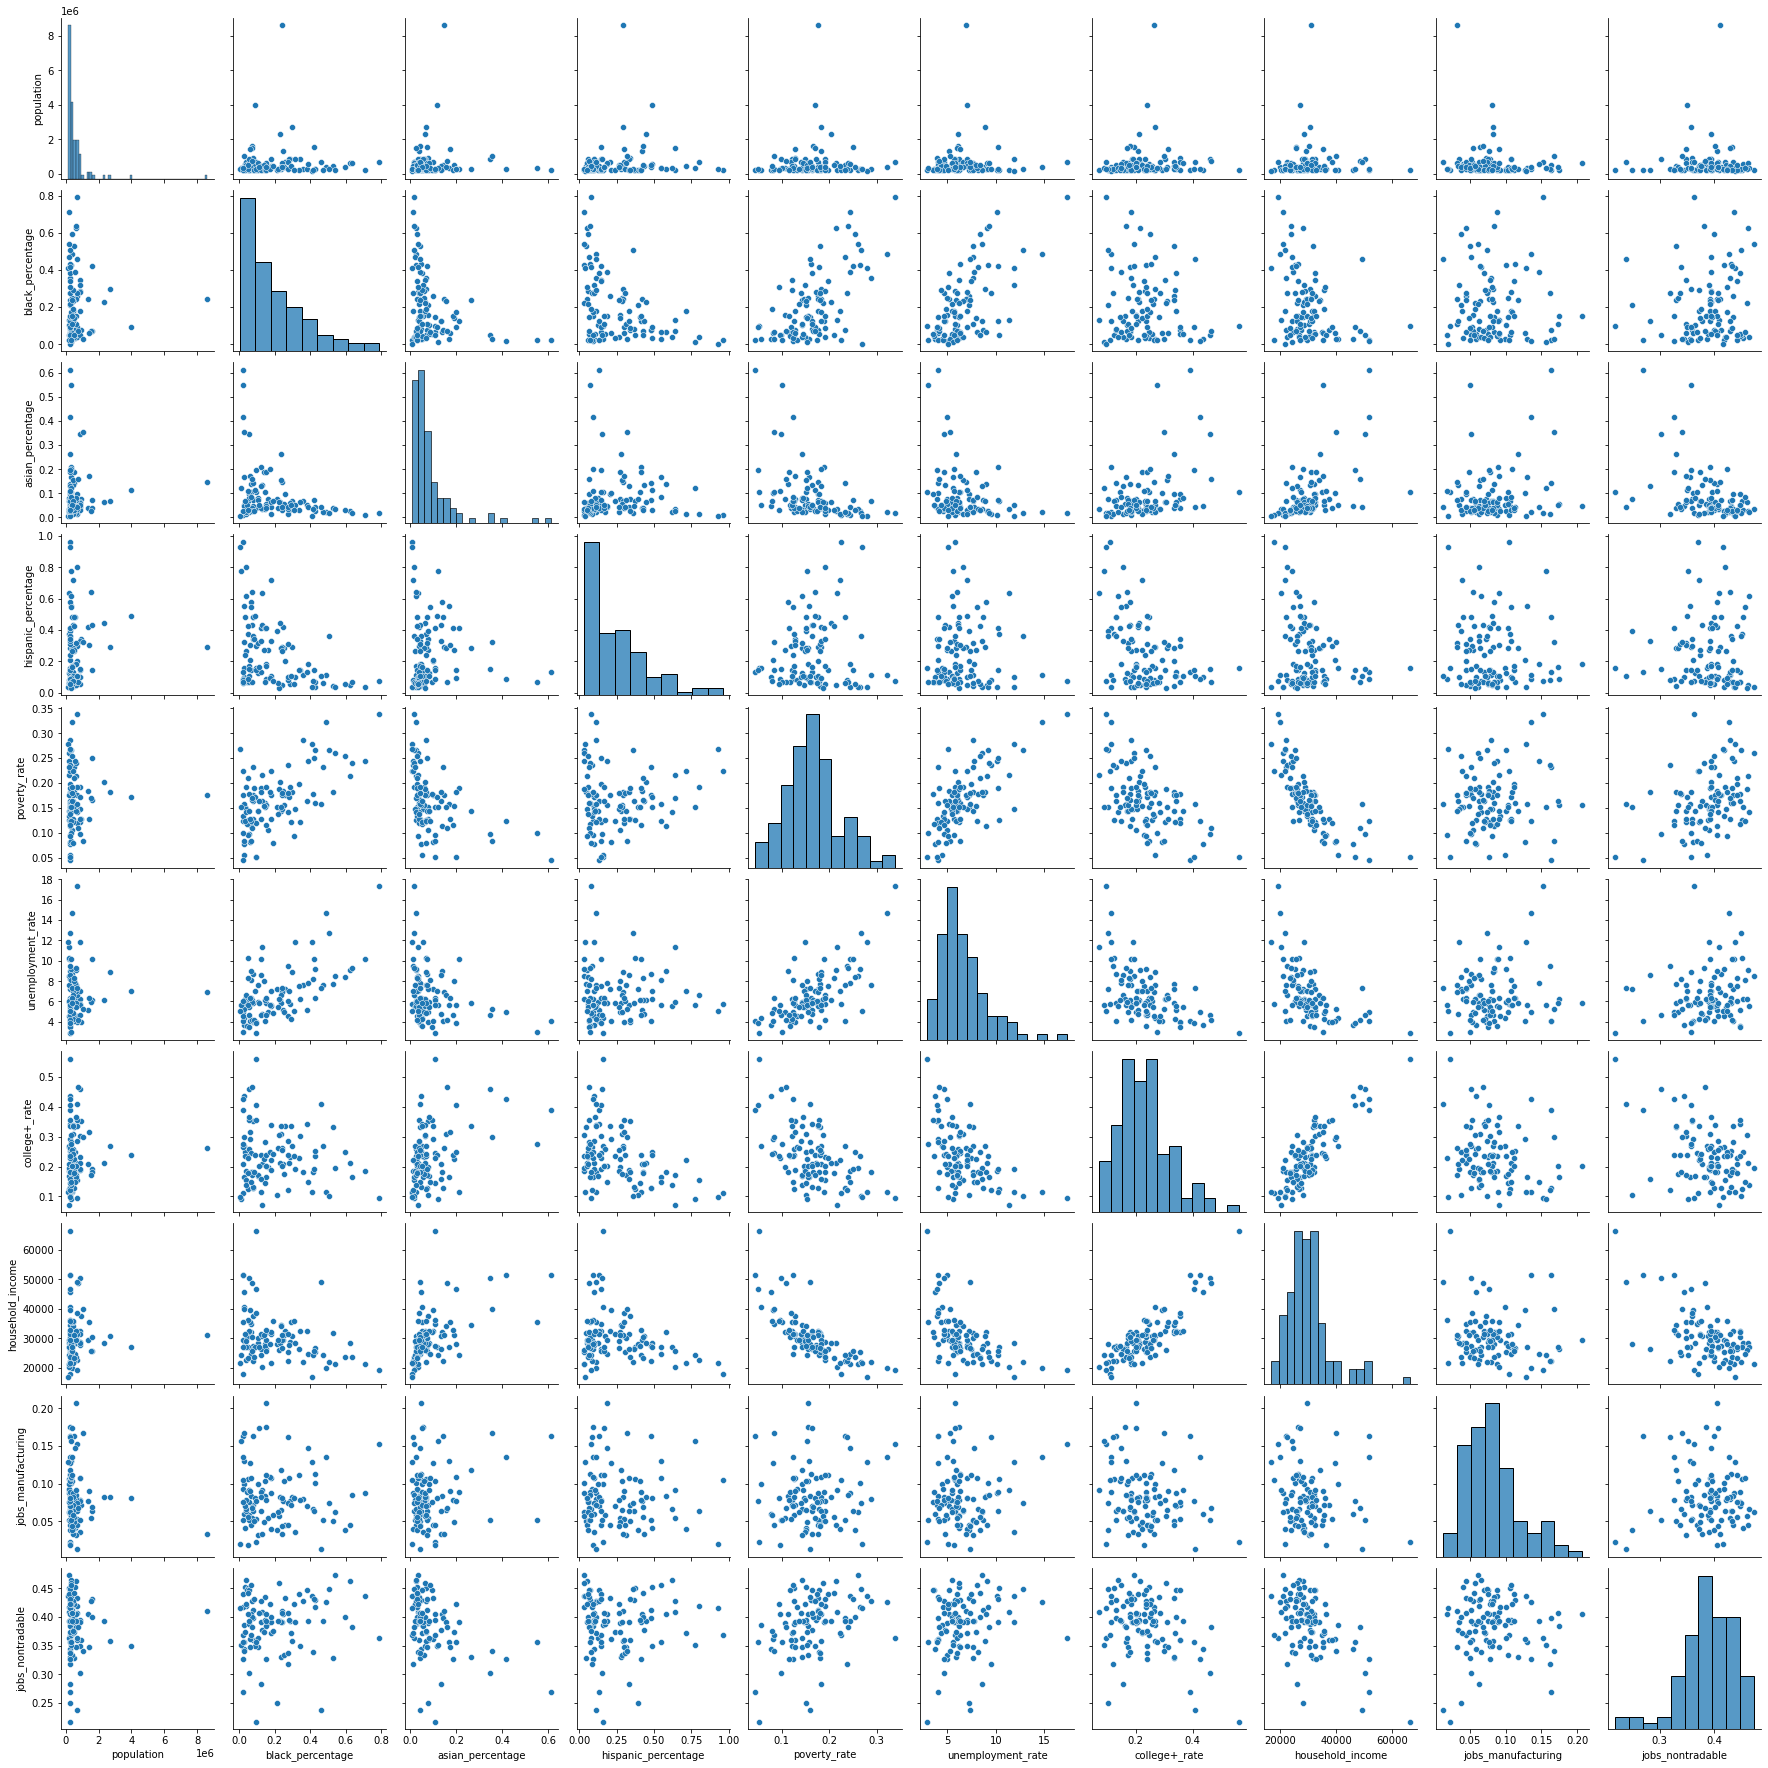

In [8]:
import seaborn as sns

sns.pairplot(df.iloc[:,3:])


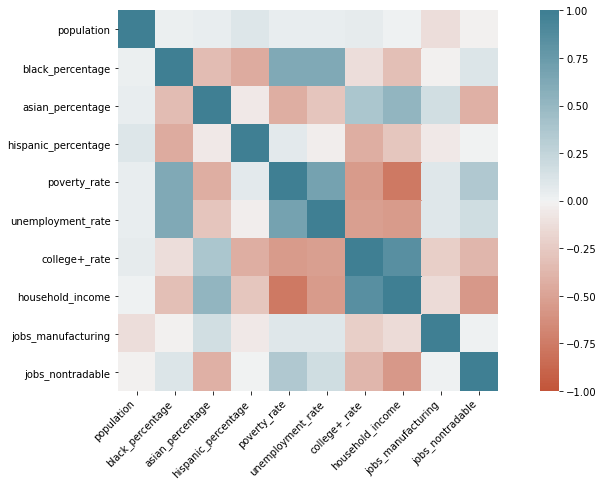

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))

corr = df.iloc[:,3:].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [22]:
df.iloc[:,3:].corr()


,population,black_percentage,asian_percentage,hispanic_percentage,poverty_rate,unemployment_rate,college+_rate,household_income,jobs_manufacturing,jobs_nontradable
population,1.000000,0.024498,0.045470,0.107503,0.042586,0.040402,0.060985,0.020612,-0.129814,-0.009722
black_percentage,0.024498,1.000000,-0.335579,-0.438150,0.617855,0.617652,-0.130849,-0.325741,-0.022088,0.109877
asian_percentage,0.045470,-0.335579,1.000000,-0.049003,-0.431648,-0.284440,0.380947,0.522050,0.174720,-0.417329
hispanic_percentage,0.107503,-0.438150,-0.049003,1.000000,0.072599,-0.024359,-0.431018,-0.272385,-0.058711,0.005076
poverty_rate,0.042586,0.617855,-0.431648,0.072599,1.000000,0.681519,-0.543371,-0.758075,0.092156,0.360778
unemployment_rate,0.040402,0.617652,-0.284440,-0.024359,0.681519,1.000000,-0.529481,-0.542507,0.096960,0.184553
college+_rate,0.060985,-0.130849,0.380947,-0.431018,-0.543371,-0.529481,1.000000,0.844414,-0.222217,-0.371417
household_income,0.020612,-0.325741,0.522050,-0.272385,-0.758075,-0.542507,0.844414,1.000000,-0.144913,-0.559804
jobs_manufacturing,-0.129814,-0.022088,0.174720,-0.058711,0.092156,0.096960,-0.222217,-0.144913,1.000000,0.011619
jobs_nontradable,-0.009722,0.109877,-0.417329,0.005076,0.360778,0.184553,-0.371417,-0.559804,0.011619,1.000000


In [17]:
df.iloc[:,5:]

,black_percentage,asian_percentage,hispanic_percentage,poverty_rate,unemployment_rate,college+_rate,household_income,jobs_manufacturing,jobs_nontradable,population_ordinal,region_Midwest,region_Northeast,region_South,region_West
0,0.711249,0.011629,0.034464,0.244703,10.171122,0.185058,21216,0.087914,0.435968,0,0,0,1,0
1,0.050313,0.107509,0.089738,0.096142,5.642562,0.229314,36321,0.019000,0.404610,1,0,0,0,1
2,0.026411,0.050028,0.156398,0.055702,4.411837,0.267740,40769,0.099698,0.385786,0,0,0,0,1
3,0.079316,0.046217,0.364759,0.163829,5.844659,0.129907,26293,0.063407,0.430350,0,0,0,0,1
4,0.025605,0.047794,0.098781,0.077877,3.698453,0.435276,45824,0.059127,0.344301,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,0.189785,0.068270,0.078269,0.078577,4.850269,0.241194,35795,0.057844,0.374903,2,0,0,1,0
101,0.021590,0.027536,0.060342,0.174923,6.034483,0.209746,27017,0.075052,0.440893,0,0,0,0,1
102,0.068960,0.158231,0.066517,0.108456,4.177120,0.465489,48582,0.067951,0.382970,2,0,0,0,1
103,0.056457,0.095969,0.068457,0.178535,3.478357,0.354452,32257,0.075364,0.446632,1,1,0,0,0


## Feature Scaling

In [84]:
df.iloc[:,5:14]

,black_percentage,asian_percentage,hispanic_percentage,poverty_rate,unemployment_rate,college+_rate,household_income,jobs_manufacturing,jobs_nontradable
0,0.711249,0.011629,0.034464,0.244703,10.171122,0.185058,21216,0.087914,0.435968
1,0.050313,0.107509,0.089738,0.096142,5.642562,0.229314,36321,0.019000,0.404610
2,0.026411,0.050028,0.156398,0.055702,4.411837,0.267740,40769,0.099698,0.385786
3,0.079316,0.046217,0.364759,0.163829,5.844659,0.129907,26293,0.063407,0.430350
4,0.025605,0.047794,0.098781,0.077877,3.698453,0.435276,45824,0.059127,0.344301
...,...,...,...,...,...,...,...,...,...
100,0.189785,0.068270,0.078269,0.078577,4.850269,0.241194,35795,0.057844,0.374903
101,0.021590,0.027536,0.060342,0.174923,6.034483,0.209746,27017,0.075052,0.440893
102,0.068960,0.158231,0.066517,0.108456,4.177120,0.465489,48582,0.067951,0.382970
103,0.056457,0.095969,0.068457,0.178535,3.478357,0.354452,32257,0.075364,0.446632


In [85]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(df.iloc[:,5:14])
place_labels = df.iloc[:,2]

from sklearn.preprocessing import MinMaxScaler
# X_scaled = MinMaxScaler().fit_transform(df.iloc[:,5:])


In [145]:
df.iloc[:,3:4]

,population
0,212744
1,294356
2,242362
3,246708
4,249947
...,...
100,450435
101,217096
102,724764
103,255239


## PCA

In [140]:
from sklearn.decomposition import PCA
pca = PCA(n_components=9)
pca = pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print("original shape:   ", X_scaled.shape)
print("transformed shape:", X_pca.shape)

original shape:    (105, 9)
transformed shape: (105, 9)


In [150]:
X_pca = pd.DataFrame(X_pca)
X_pca['population'] = df.population_ordinal
X_pca = np.array(X_pca)

In [151]:
X_pca

,0,1,2,3,4,5,6,7,8,population
0,-3.231226,-2.369937,0.081933,-0.195615,0.245952,-0.172215,0.078919,0.892433,-0.121736,0
1,1.410831,0.021124,-1.449775,-0.170855,0.666234,1.209743,0.478533,-0.207131,0.366179,1
2,2.170201,0.362071,-0.220368,-1.058921,-0.893293,0.968166,-0.322746,0.237509,0.261665,0
3,-0.743202,1.374530,-0.741625,-0.356018,0.218186,0.347405,0.373143,0.021231,0.364766,0
4,3.469402,-0.729518,-1.136638,-0.256073,-0.918455,0.054157,-0.637400,-0.467356,-0.079956,0
...,...,...,...,...,...,...,...,...,...,...
100,1.456299,-0.400979,-0.760480,-0.333116,-0.414538,0.939451,0.555814,0.451544,0.094681,2
101,-0.401939,0.289093,-0.733179,-1.327673,0.167036,0.382868,0.302334,-0.961569,0.159620,0
102,3.501372,-1.135343,-0.629890,-0.633421,0.324888,-0.404653,-1.001863,-0.384121,0.226614,2
103,1.046489,-0.213001,-0.918963,-1.679396,0.560452,-0.929675,-0.015602,-0.720451,0.000706,1


In [136]:
print(X_pca)

            0         1         2         3         4         5         6  \
0   -3.231226 -2.369937  0.081933 -0.195615  0.245952 -0.172215  0.078919   
1    1.410831  0.021124 -1.449775 -0.170855  0.666234  1.209743  0.478533   
2    2.170201  0.362071 -0.220368 -1.058921 -0.893293  0.968166 -0.322746   
3   -0.743202  1.374530 -0.741625 -0.356018  0.218186  0.347405  0.373143   
4    3.469402 -0.729518 -1.136638 -0.256073 -0.918455  0.054157 -0.637400   
..        ...       ...       ...       ...       ...       ...       ...   
100  1.456299 -0.400979 -0.760480 -0.333116 -0.414538  0.939451  0.555814   
101 -0.401939  0.289093 -0.733179 -1.327673  0.167036  0.382868  0.302334   
102  3.501372 -1.135343 -0.629890 -0.633421  0.324888 -0.404653 -1.001863   
103  1.046489 -0.213001 -0.918963 -1.679396  0.560452 -0.929675 -0.015602   
104 -2.072322 -0.531661  1.473827 -0.478893 -0.645130 -0.559587  0.149721   

            7         8  
0    0.892433 -0.121736  
1   -0.207131  0.366179

In [137]:
print(pca.explained_variance_)

[3.88638324 1.69479491 1.20205711 0.92477024 0.52124637 0.34410805
 0.27364107 0.17284162 0.06669585]


In [139]:
pca.explained_variance_ratio_

array([0.42770778, 0.18651711, 0.13228988, 0.10177366, 0.05736468,
       0.03787009, 0.030115  , 0.01902172, 0.00734007])

In [119]:
X_pca.shape

(105, 9)

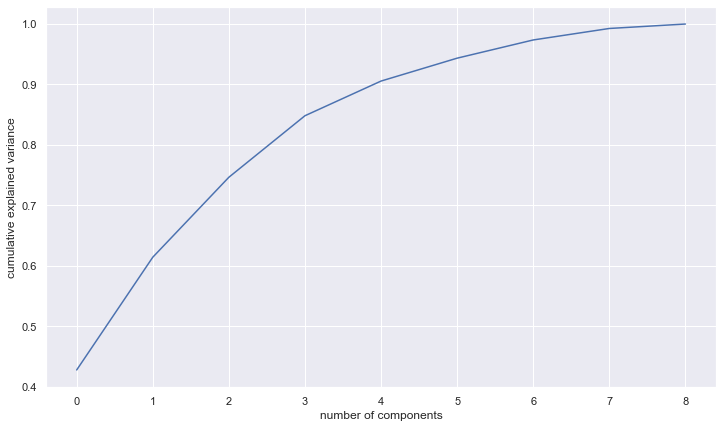

In [120]:
# pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## TSNE 

In [152]:
from sklearn.manifold import TSNE
X_embedded = TSNE().fit_transform(X_pca)

In [153]:
import pandas as pd
df_emb=pd.DataFrame({"X_embedded[:,0]":X_embedded[:,0], "X_embedded[:,1]": X_embedded[:,1]})
df_emb.head()

,"X_embedded[:,0]","X_embedded[:,1]"
0,-0.004787,6.208159
1,-1.305478,-2.526790
2,-0.313948,-3.905807
3,-5.057570,-2.469376
4,1.270116,-4.139797


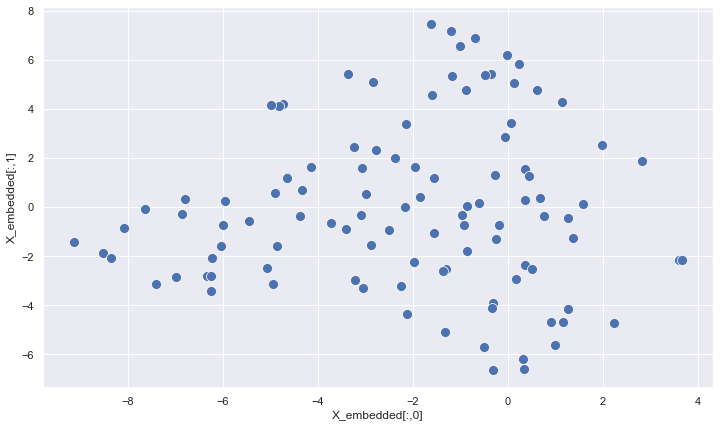

In [154]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12, 7)})
sns.scatterplot(data=df_emb,x="X_embedded[:,0]", y="X_embedded[:,1]",s = 100 )


## AgglomerativeClustering

In [36]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
model.fit(X_scaled)

AgglomerativeClustering(n_clusters=7)

In [37]:
df['HC_labels'] = model.labels_
df['HC_labels'].value_counts()

0    24
5    20
1    17
4    16
2    16
3     7
6     5
Name: HC_labels, dtype: int64

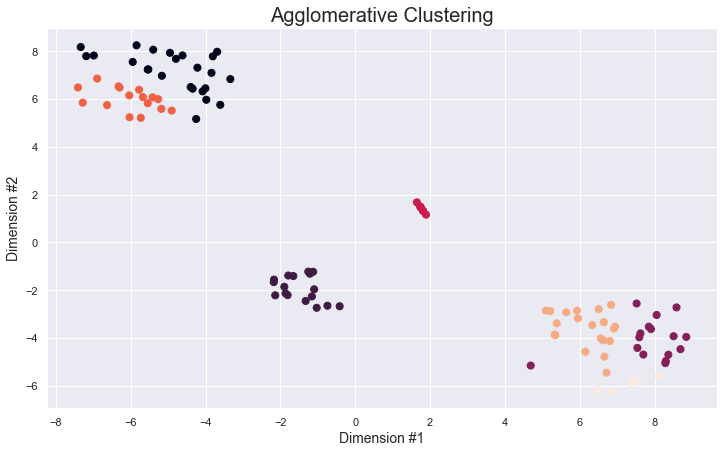

In [40]:
import matplotlib

# Plotting resulting clusters
plt.figure(figsize=(12,7))
plt.scatter(df_emb['X_embedded[:,0]'],df_emb['X_embedded[:,1]'],c=model.labels_,s=50)
plt.title('Agglomerative Clustering',fontsize=20)
plt.xlabel('Dimension #1',fontsize=14)
plt.ylabel('Dimension #2',fontsize=14)
plt.show()

## Cluster profiling

In [41]:
df.groupby('HC_labels').mean()

,place_code,state_code,population,black_percentage,asian_percentage,hispanic_percentage,poverty_rate,unemployment_rate,college+_rate,household_income,jobs_manufacturing,jobs_nontradable,population_ordinal
HC_labels,,,,,,,,,,,,,
0,38064.250000,12.666667,2.885304e+05,0.064894,0.145072,0.316298,0.132468,6.347029,0.208976,31964.416667,0.088938,0.376172,0.583333
1,35941.352941,31.705882,5.545092e+05,0.269193,0.054254,0.108686,0.204270,7.825412,0.205356,26659.647059,0.116694,0.400055,1.470588
2,38439.250000,37.500000,7.613302e+05,0.241098,0.062163,0.183076,0.136659,5.867233,0.289563,35600.500000,0.076099,0.360861,2.187500
3,39571.428571,35.571429,1.714784e+06,0.320323,0.104259,0.204563,0.212387,8.114500,0.245335,27695.714286,0.067062,0.420401,1.714286
4,48937.500000,14.437500,9.459936e+05,0.081299,0.122572,0.301089,0.141489,6.013941,0.278937,33811.750000,0.067839,0.379432,2.312500
5,37301.350000,33.850000,3.157452e+05,0.349824,0.044750,0.178016,0.182546,6.687146,0.221682,27036.450000,0.072191,0.407353,0.700000
6,41092.800000,33.600000,6.320934e+05,0.062001,0.013977,0.810203,0.215457,6.090787,0.151182,21940.000000,0.056279,0.400651,1.600000


## Spectral Clustering

In [42]:
from sklearn.cluster import SpectralClustering
clustering = SpectralClustering(n_clusters=7,assign_labels="discretize",random_state=0).fit(X_scaled)


In [43]:
df['spectral_labels'] = clustering.labels_
df['spectral_labels'].value_counts()

6    22
0    22
4    19
2    18
5    11
1     7
3     6
Name: spectral_labels, dtype: int64

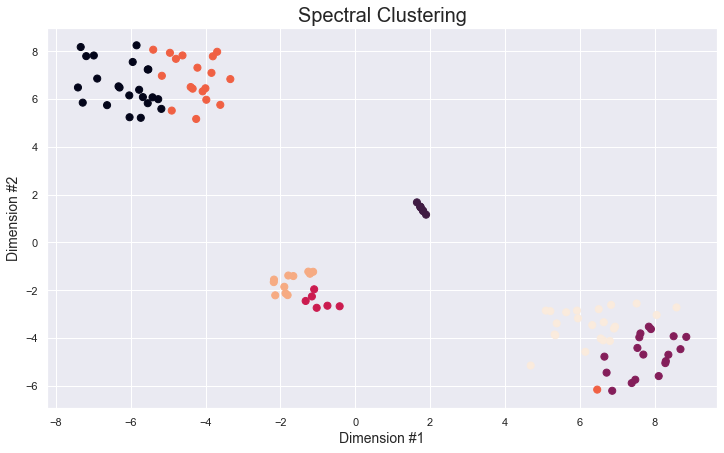

In [44]:
# Plotting resulting clusters
plt.figure(figsize=(12,7))
plt.scatter(df_emb['X_embedded[:,0]'],df_emb['X_embedded[:,1]'],c=clustering.labels_,s=50)
plt.title('Spectral Clustering',fontsize=20)
plt.xlabel('Dimension #1',fontsize=14)
plt.ylabel('Dimension #2',fontsize=14)
plt.show()

## Kmeans

In [55]:
from sklearn.cluster import KMeans
# # defining the kmeans function with initialization as k-means++
# kmeans = KMeans(n_clusters=7, init='k-means++')

# # fitting the k means algorithm on scaled data
# kmeans.fit(X_scaled)

In [56]:
# # fitting multiple k-means algorithms and storing the values in an empty list
# SSE = []
# for cluster in range(1,20):
#     kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
#     kmeans.fit(X_scaled)
#     SSE.append(kmeans.inertia_)

# # converting the results into a dataframe and plotting them
# frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
# plt.figure(figsize=(12,6))
# plt.plot(frame['Cluster'], frame['SSE'], marker='o')
# plt.xlabel('Number of clusters')
# plt.ylabel('Inertia')

In [57]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 7, init='k-means++',random_state=0)
kmeans.fit(X_scaled)
pred = kmeans.predict(X_scaled)

/Users/e106922/opt/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


In [58]:
df['KNN_labels'] = pred
df['KNN_labels'].value_counts()

0    26
1    20
2    17
6    15
5    14
4     7
3     6
Name: KNN_labels, dtype: int64

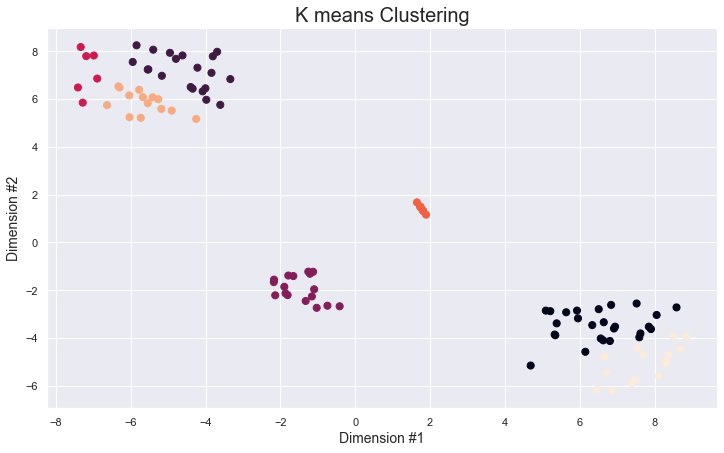

In [59]:

# Plotting resulting clusters
plt.figure(figsize=(12,7))
plt.scatter(df_emb['X_embedded[:,0]'],df_emb['X_embedded[:,1]'],c=df['KNN_labels'],s=50)
plt.title('K means Clustering',fontsize=20)
plt.xlabel('Dimension #1',fontsize=14)
plt.ylabel('Dimension #2',fontsize=14)
plt.show()

In [81]:
df.head()

,place_code,state_code,place_name,population,black_percentage,asian_percentage,hispanic_percentage,poverty_rate,unemployment_rate,college+_rate,household_income,jobs_manufacturing,jobs_nontradable,HC_labels,KNN_labels,spectral_labels
0,2000,35,Albuquerque,558558,0.030854,0.028969,0.483772,0.150690,6.256532,0.247562,28514,0.041306,0.451648,3,5,1
1,2000,6,Anaheim,352456,0.027916,0.166401,0.550454,0.156888,5.628521,0.165984,27111,0.130424,0.355603,3,5,5
2,7000,1,Birmingham,212744,0.711249,0.011629,0.034464,0.244703,10.171122,0.185058,21216,0.087914,0.435968,1,0,0
3,3000,51,Arlington CDP,234965,0.096197,0.106178,0.156351,0.051655,2.936158,0.561292,66404,0.021892,0.217470,6,4,4
4,4000,13,Atlanta,486299,0.528251,0.040204,0.042932,0.181092,7.676685,0.333135,31873,0.050543,0.328990,1,0,3


## Size constrainted clustering

In [156]:
from size_constrained_clustering import fcm, equal, minmax, shrinkage,da
from sklearn.metrics.pairwise import haversine_distances

In [158]:
n_clusters = 7

# use heuristics method to solve
model = equal.SameSizeKMeansHeuristics(n_clusters)

model.fit(np.array(X_pca))
centers = model.cluster_centers_
labels = model.labels_

Reach maximum iterations! Now pending transfer samples 16!


In [159]:
df['sc_labels'] = labels
df['sc_labels'].value_counts()

6    15
5    15
4    15
3    15
2    15
1    15
0    15
Name: sc_labels, dtype: int64

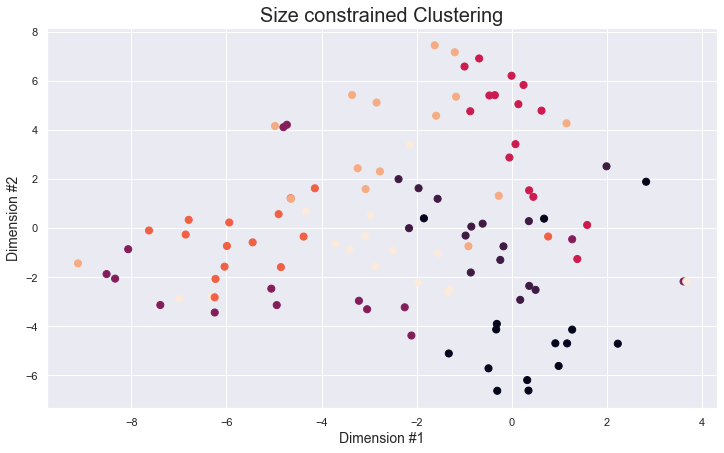

In [160]:

# Plotting resulting clusters
plt.figure(figsize=(12,7))
plt.scatter(df_emb['X_embedded[:,0]'],df_emb['X_embedded[:,1]'],c=df['sc_labels'],s=50)
plt.title('Size constrained Clustering',fontsize=20)
plt.xlabel('Dimension #1',fontsize=14)
plt.ylabel('Dimension #2',fontsize=14)
plt.show()

## K means Constrainted

In [164]:
from k_means_constrained import KMeansConstrained
clf = KMeansConstrained(n_clusters=7,size_min=15,size_max=15,random_state=0)

clf.fit_predict(np.array(X_pca))
clf.cluster_centers_
clf.labels_

array([5, 6, 6, 1, 3, 3, 4, 4, 4, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 0, 4, 0,
       4, 3, 3, 3, 4, 6, 6, 6, 3, 1, 6, 0, 2, 4, 0, 0, 3, 6, 0, 2, 0, 2,
       2, 2, 0, 5, 5, 5, 0, 5, 2, 0, 6, 6, 1, 1, 6, 6, 4, 3, 5, 4, 5, 0,
       2, 2, 2, 0, 0, 5, 5, 5, 5, 0, 2, 2, 6, 2, 5, 5, 0, 1, 3, 4, 1, 3,
       1, 2, 4, 4, 3, 4, 4, 4, 5, 3, 6, 2, 6, 2, 3, 6, 5], dtype=int32)

In [165]:
df['knn_const_labels'] = clf.labels_
df['knn_const_labels'].value_counts()

6    15
5    15
4    15
3    15
2    15
1    15
0    15
Name: knn_const_labels, dtype: int64

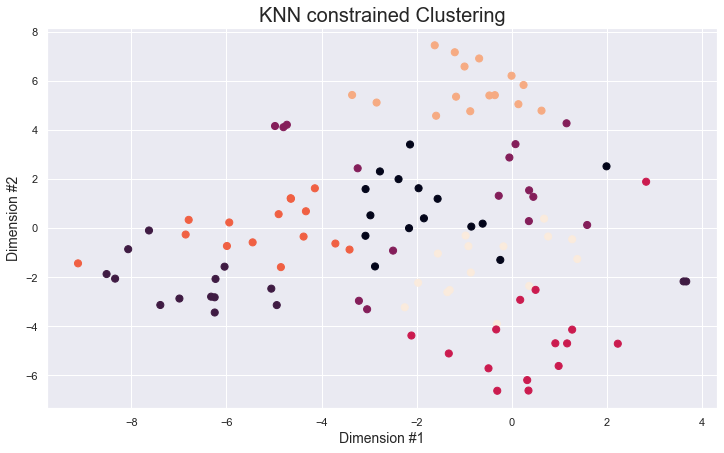

In [166]:

# Plotting resulting clusters
plt.figure(figsize=(12,7))
plt.scatter(df_emb['X_embedded[:,0]'],df_emb['X_embedded[:,1]'],c=df['knn_const_labels'],s=50)
plt.title('KNN constrained Clustering',fontsize=20)
plt.xlabel('Dimension #1',fontsize=14)
plt.ylabel('Dimension #2',fontsize=14)
plt.show()

In [177]:
df.to_csv("df_output_pca.csv")

## Cluster Profiling

In [66]:
len(X_scaled[0])

14

In [167]:
df_cluster = pd.DataFrame(np.array(X_pca),columns =['black_percentage', 'asian_percentage', 'hispanic_percentage',
       'poverty_rate', 'unemployment_rate', 'college+_rate',
       'household_income', 'jobs_manufacturing', 'jobs_nontradable','population_ordinal'])

In [172]:
df_cluster['sc_labels'] = df['knn_const_labels']

In [173]:
df.groupby('sc_labels').mean()

,place_code,state_code,population,black_percentage,asian_percentage,hispanic_percentage,poverty_rate,unemployment_rate,college+_rate,household_income,jobs_manufacturing,jobs_nontradable,population_ordinal,region_Midwest,region_Northeast,region_South,region_West,knn_const_labels
sc_labels,,,,,,,,,,,,,,,,,,
0,42582.400000,21.866667,4.450845e+05,0.101051,0.229198,0.150947,0.101974,4.610635,0.380758,44326.733333,0.084810,0.339368,1.200000,0.066667,0.133333,0.200000,0.600000,3.200000
1,40002.600000,28.866667,6.526199e+05,0.208048,0.067278,0.148633,0.141111,5.404583,0.299453,33042.400000,0.074336,0.382084,2.200000,0.200000,0.000000,0.533333,0.266667,2.133333
2,37413.600000,21.400000,2.701347e+05,0.093504,0.080774,0.387421,0.157252,6.487020,0.162842,26930.800000,0.107344,0.376590,0.333333,0.200000,0.000000,0.266667,0.533333,2.066667
3,33466.666667,35.000000,2.812100e+05,0.422748,0.032670,0.085929,0.218791,8.110960,0.221196,25327.600000,0.078305,0.435830,0.600000,0.133333,0.200000,0.600000,0.066667,4.066667
4,37132.666667,29.200000,6.618328e+05,0.080590,0.034600,0.500084,0.172358,6.114496,0.177778,26508.866667,0.064670,0.423731,1.866667,0.066667,0.000000,0.533333,0.400000,3.333333
5,46400.200000,33.800000,8.292312e+05,0.332209,0.056755,0.172284,0.217572,8.431070,0.183567,25551.000000,0.115604,0.387493,1.866667,0.466667,0.066667,0.400000,0.066667,3.466667
6,39739.466667,14.400000,1.203049e+06,0.151238,0.102356,0.303284,0.145418,7.271758,0.208364,29996.266667,0.049329,0.372697,1.600000,0.000000,0.066667,0.200000,0.733333,2.733333


In [174]:
df_cluster.groupby('sc_labels').mean()


,black_percentage,asian_percentage,hispanic_percentage,poverty_rate,unemployment_rate,college+_rate,household_income,jobs_manufacturing,jobs_nontradable,population_ordinal
sc_labels,,,,,,,,,,
0,0.113876,-0.761749,-0.378946,0.165892,0.016664,0.029448,0.031859,0.060461,-0.174021,2.333333
1,-0.844565,1.799110,0.272682,0.652737,0.072010,0.270034,-0.090236,0.084883,0.032392,0.533333
2,-0.364546,-0.231945,0.235839,-0.889032,-0.277470,-0.070842,0.187861,-0.051581,-0.073585,0.866667
3,3.358965,-0.510758,0.678898,0.424577,0.196713,-0.205102,-0.230612,0.002492,0.038037,1.400000
4,-0.468600,1.250785,-0.515867,0.242811,0.010724,-0.260096,-0.028735,-0.007645,0.044666,2.333333
5,-2.866905,-1.577610,0.440483,0.103752,0.178204,-0.183397,-0.027546,0.001755,0.135777,1.133333
6,1.071774,0.032166,-0.733089,-0.700737,-0.196844,0.419956,0.157409,-0.090366,-0.003266,1.066667


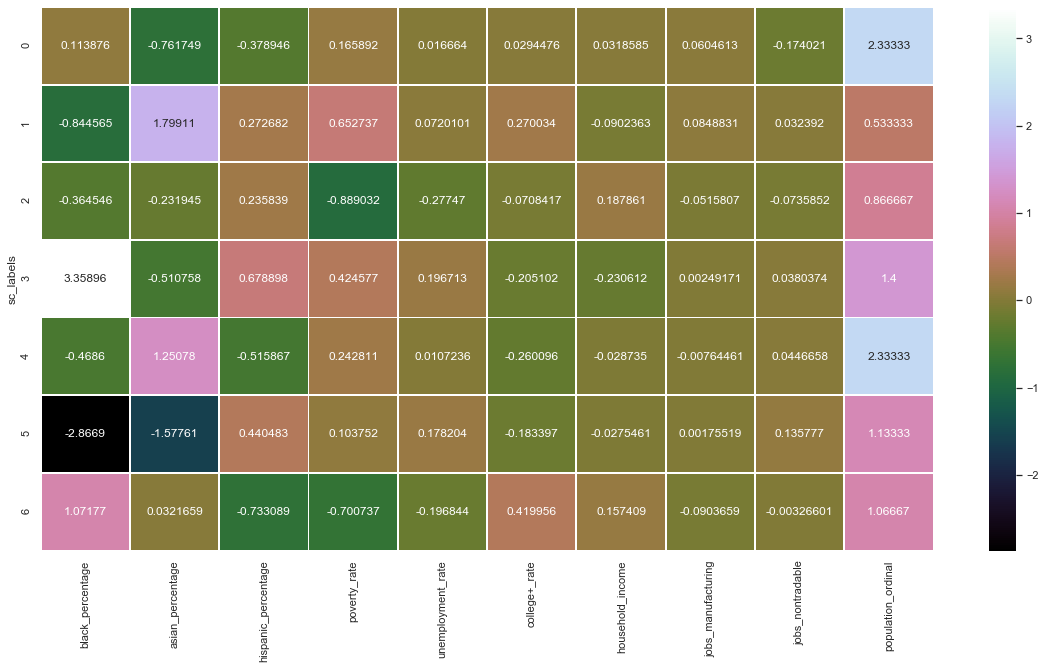

In [175]:
import seaborn as sns
# cat_profiles = categorical_profiler(premium_cluster,categorical_columns,'Cluster')
plt.figure(figsize=(20,10))
sns.heatmap(df_cluster.groupby('sc_labels').mean(), annot=True, fmt="g", cmap='cubehelix',linewidths = 0.80)
plt.show()


## Saving clustering results

In [72]:
df.to_csv('df_output_pop&region.csv',index=False)

In [73]:
df.head()

,place_code,state_code,place_name,population,population_range,black_percentage,asian_percentage,hispanic_percentage,poverty_rate,unemployment_rate,...,population_ordinal,HC_labels,spectral_labels,sc_labels,knn_const_labels,KNN_labels,region_Midwest,region_Northeast,region_South,region_West
0,7000,1,Birmingham,212744,<250K,0.711249,0.011629,0.034464,0.244703,10.171122,...,0,5,6,5,2,0,0,0,1,0
1,3000,2,Anchorage,294356,250K-400K,0.050313,0.107509,0.089738,0.096142,5.642562,...,1,0,0,0,4,1,0,0,0,1
2,27400,4,Gilbert town,242362,<250K,0.026411,0.050028,0.156398,0.055702,4.411837,...,0,0,4,2,4,1,0,0,0,1
3,27820,4,Glendale,246708,<250K,0.079316,0.046217,0.364759,0.163829,5.844659,...,0,0,4,5,0,1,0,0,0,1
4,65000,4,Scottsdale,249947,<250K,0.025605,0.047794,0.098781,0.077877,3.698453,...,0,0,0,0,4,1,0,0,0,1


## Appendix

Text(0.5, 1.0, 'UMAP projection of the Penguin dataset')

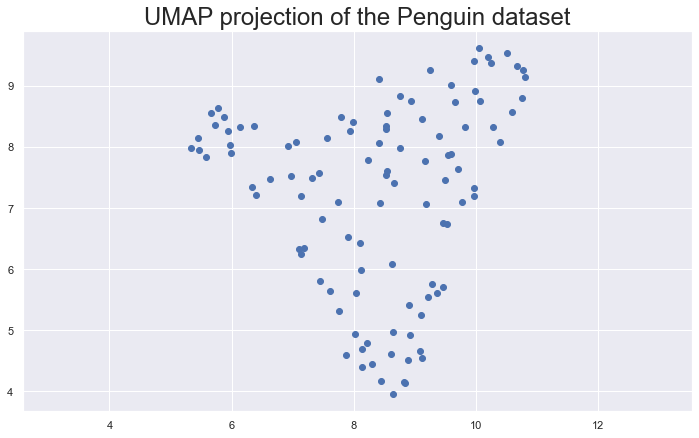

In [34]:
import umap
reducer = umap.UMAP()
embedding = reducer.fit_transform(X)
embedding.shape

plt.scatter(
    embedding[:, 0],
    embedding[:, 1])
#     c=[sns.color_palette()[x] for x in penguins.species_short.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Penguin dataset', fontsize=24)

In [121]:
df.head()

,place_code,state_code,place_name,population,black_percentage,asian_percentage,hispanic_percentage,poverty_rate,unemployment_rate,college+_rate,household_income,jobs_manufacturing,jobs_nontradable,HC_labels,KNN_labels,spectral_labels,sc_labels,knn_const_labels
0,2000,35,Albuquerque,558558,0.030854,0.028969,0.483772,0.150690,6.256532,0.247562,28514,0.041306,0.451648,3,5,1,1,6
1,2000,6,Anaheim,352456,0.027916,0.166401,0.550454,0.156888,5.628521,0.165984,27111,0.130424,0.355603,3,5,5,6,5
2,7000,1,Birmingham,212744,0.711249,0.011629,0.034464,0.244703,10.171122,0.185058,21216,0.087914,0.435968,1,0,0,4,4
3,3000,51,Arlington CDP,234965,0.096197,0.106178,0.156351,0.051655,2.936158,0.561292,66404,0.021892,0.217470,6,4,4,0,2
4,4000,13,Atlanta,486299,0.528251,0.040204,0.042932,0.181092,7.676685,0.333135,31873,0.050543,0.328990,1,0,3,0,1


In [126]:

## take the list from R code (user attention required)
columns_to_ignore = ['place_code','state_code','HC_labels','KNN_labels','spectral_labels','knn_const_labels']
column_main = [x for x in df.columns.tolist() if x not in columns_to_ignore]

cluster_data_main = df[column_main]

cluster_data_main.head(1)

,place_name,population,black_percentage,asian_percentage,hispanic_percentage,poverty_rate,unemployment_rate,college+_rate,household_income,jobs_manufacturing,jobs_nontradable,sc_labels
0,Albuquerque,558558,0.030854,0.028969,0.483772,0.15069,6.256532,0.247562,28514,0.041306,0.451648,1


In [127]:
id_column = ['place_name'] ## will be present in the list from R code (user attention required)
cluster_column = 'sc_labels'


## take the list from R code (user attention required)
columns_nottoscale = ["CreditStatus",
                      "PaymentTermsDescription",
                      "CustomerOnHold",
                      "CreditCheckFlag",
                      "RFMScore",
                      'PriceCode',
                      'TaxStatus',
                      'CustomerClass',
                      'r_quartile',
                      'm_quartile',
                      'f_quartile']

final_profile_datacols = [x for x in cluster_data_main.columns.tolist() if x not in columns_nottoscale]

In [130]:
profile_data = cluster_data_main[final_profile_datacols]
profile_data.head(1)


,place_name,population,black_percentage,asian_percentage,hispanic_percentage,poverty_rate,unemployment_rate,college+_rate,household_income,jobs_manufacturing,jobs_nontradable,sc_labels
0,Albuquerque,558558,0.030854,0.028969,0.483772,0.15069,6.256532,0.247562,28514,0.041306,0.451648,1


In [131]:

numerical_columns = [x for x in profile_data.columns.tolist() if x not in id_column + [cluster_column]]
print(numerical_columns)

['population', 'black_percentage', 'asian_percentage', 'hispanic_percentage', 'poverty_rate', 'unemployment_rate', 'college+_rate', 'household_income', 'jobs_manufacturing', 'jobs_nontradable']


In [120]:
###### Profiling characteristics ########
#########################################
def numerical_profiler(data,num_col_list,cluster_column):
    columns_list = num_col_list + [cluster_column]
    data_subset = data[columns_list]
    df_stat_main = pd.DataFrame()
    for i in data[cluster_column].unique().tolist():
        df_temp = data[data[cluster_column] == i][num_col_list]
        df_stat = df_temp.describe().T.reset_index().rename(columns = {'index':'Features'})
        df_stat['sum'] = df_temp.sum().values
        df_stat['Cluster'] = 'Cluster_' + str(int(i))
        df_stat_main = df_stat_main.append(df_stat, ignore_index = True)
    return df_stat_main

###################
###################

In [132]:
num_profiles = numerical_profiler(profile_data,numerical_columns,cluster_column)


In [133]:
num_profiles

,Features,count,mean,std,min,25%,50%,75%,max,sum,Cluster
0,population,15.0,686718.733333,972407.025676,214220.000000,266192.500000,327722.000000,547117.000000,3.999742e+06,1.030078e+07,Cluster_1
1,black_percentage,15.0,0.068795,0.046605,0.002218,0.038437,0.066916,0.083190,1.800157e-01,1.031921e+00,Cluster_1
2,asian_percentage,15.0,0.058490,0.058095,0.005963,0.019206,0.031034,0.077729,2.102159e-01,8.773515e-01,Cluster_1
3,hispanic_percentage,15.0,0.606798,0.180632,0.371655,0.482676,0.581490,0.678965,9.616283e-01,9.101967e+00,Cluster_1
4,poverty_rate,15.0,0.179549,0.044121,0.113995,0.146153,0.175672,0.212801,2.685285e-01,2.693237e+00,Cluster_1
...,...,...,...,...,...,...,...,...,...,...,...
65,unemployment_rate,15.0,6.732562,1.107654,5.672790,5.893890,6.296215,7.270975,9.519033e+00,1.009884e+02,Cluster_3
66,college+_rate,15.0,0.196254,0.035646,0.122089,0.175533,0.200618,0.220803,2.524664e-01,2.943817e+00,Cluster_3
67,household_income,15.0,27012.533333,2360.972768,22506.000000,25565.000000,26656.000000,28756.500000,3.149600e+04,4.051880e+05,Cluster_3
68,jobs_manufacturing,15.0,0.118854,0.045391,0.044600,0.090354,0.111222,0.154392,2.069829e-01,1.782815e+00,Cluster_3


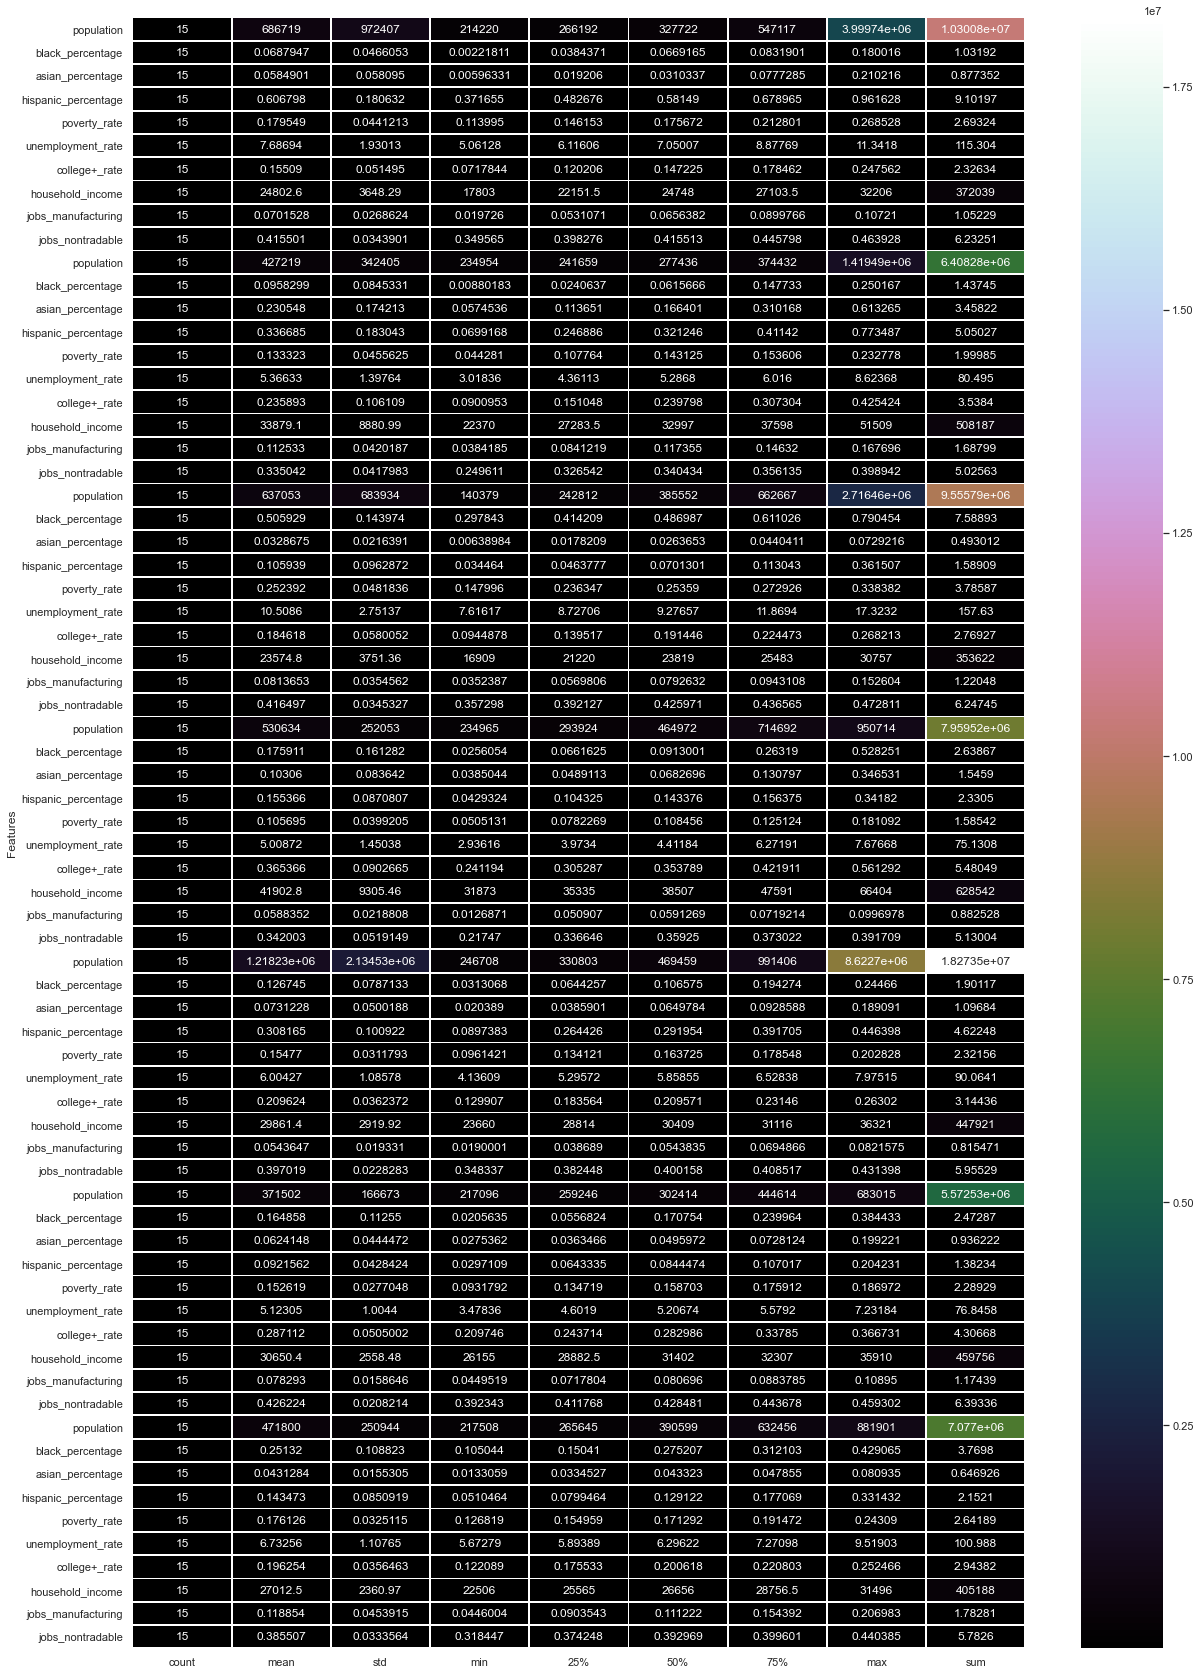

In [139]:
import seaborn as sns
# cat_profiles = categorical_profiler(premium_cluster,categorical_columns,'Cluster')
plt.figure(figsize=(20,30))
sns.heatmap(num_profiles.set_index('Features').drop(['Cluster'] , axis = 1), annot=True, fmt="g", cmap='cubehelix',linewidths = 0.80)
plt.show()
